In [24]:
# load necessay packages
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
#load data
data = pd.read_csv("datasets/Paitients_Files_Train 1.csv")

#preview data
data

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


In [26]:
# set index to a specific column
data.set_index('ID', inplace=True)

data

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
ID,,,,,,,,,,
ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...
ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative


### DATA UNDERSTANDING

In [27]:
data.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 599 entries, ICU200010 to ICU200608
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRG        599 non-null    int64  
 1   PL         599 non-null    int64  
 2   PR         599 non-null    int64  
 3   SK         599 non-null    int64  
 4   TS         599 non-null    int64  
 5   M11        599 non-null    float64
 6   BD2        599 non-null    float64
 7   Age        599 non-null    int64  
 8   Insurance  599 non-null    int64  
 9   Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 51.5+ KB


In [29]:
# check for null values
data.isnull().sum()

PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

There are no null values in the dataset

In [30]:
# check for duplicates
data.duplicated().sum()

0

# Univariate Analysis

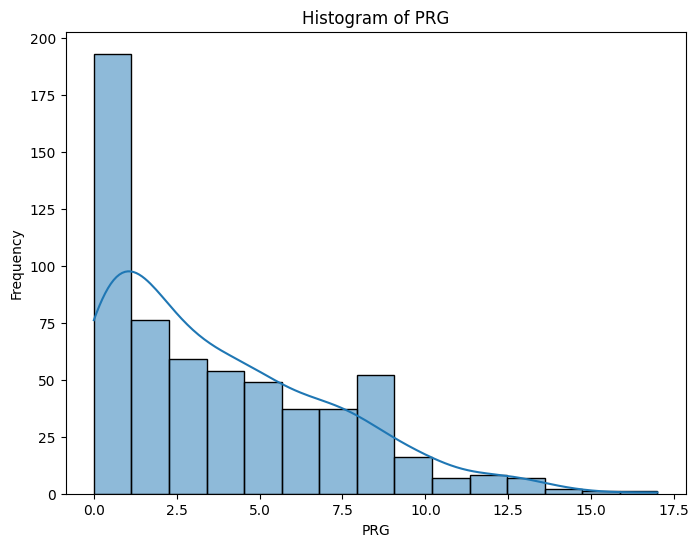

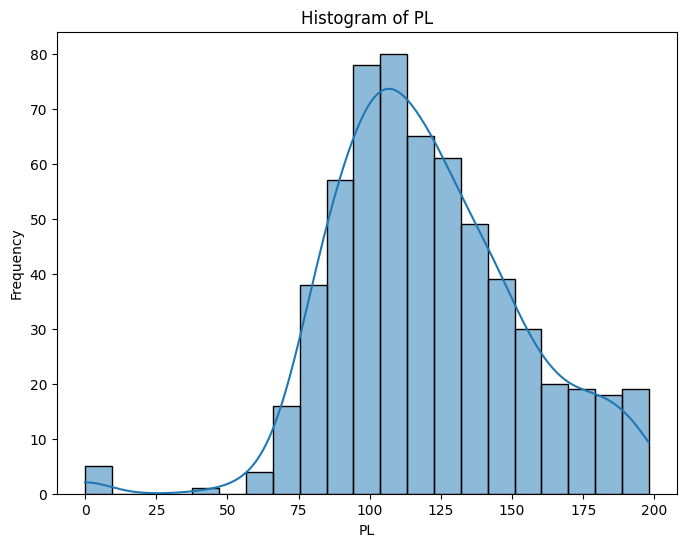

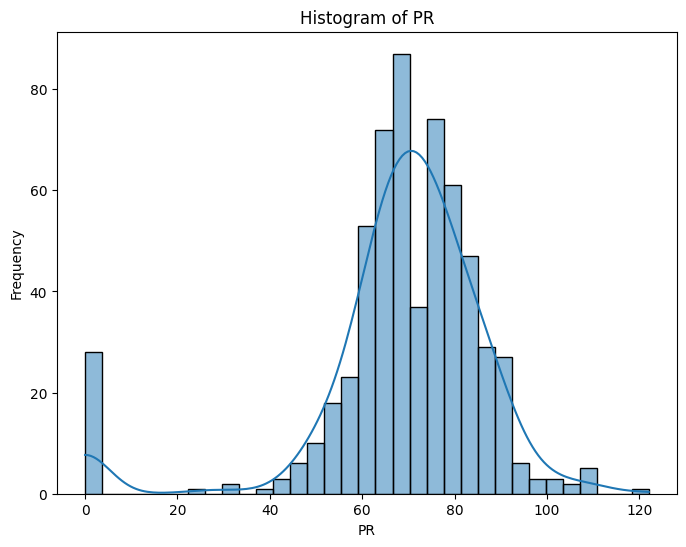

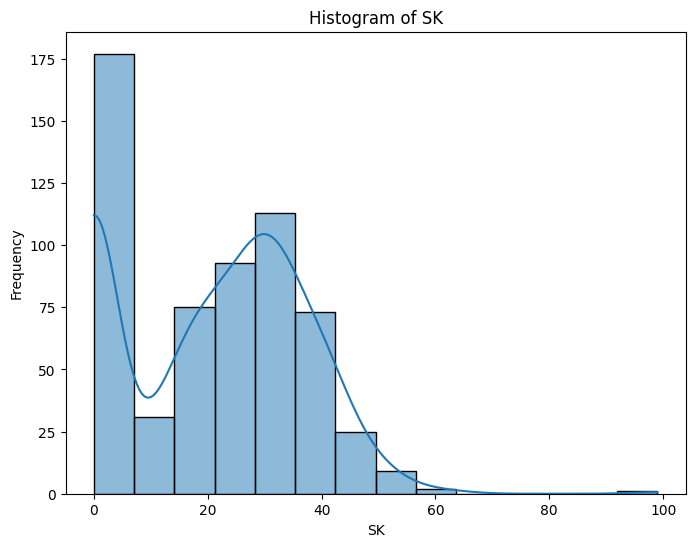

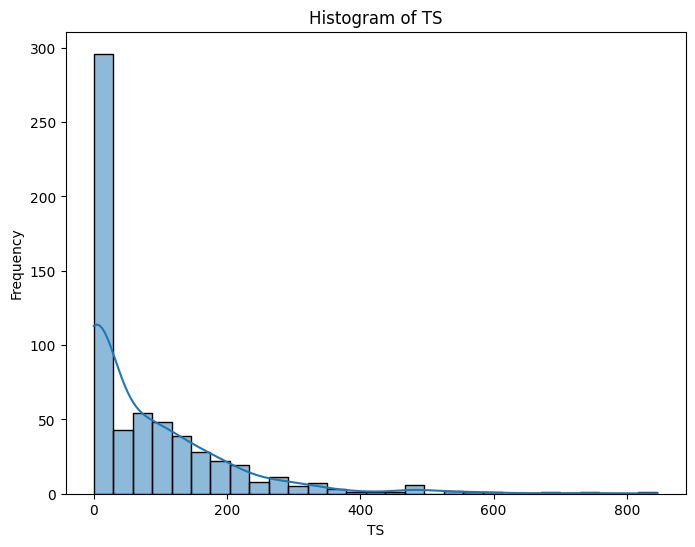

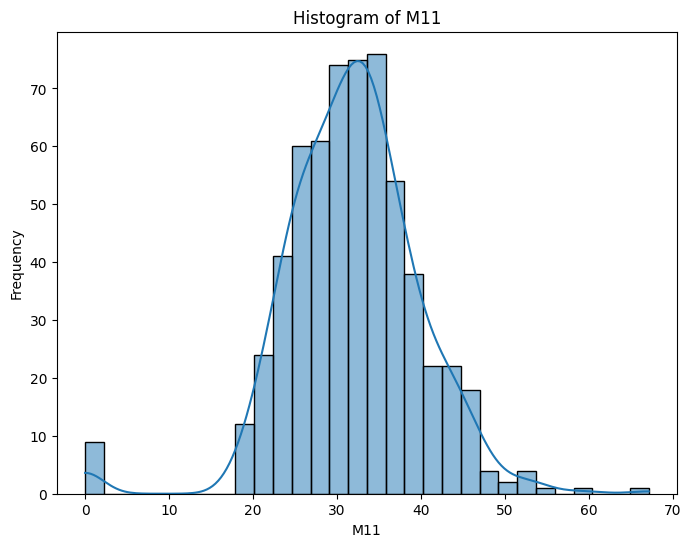

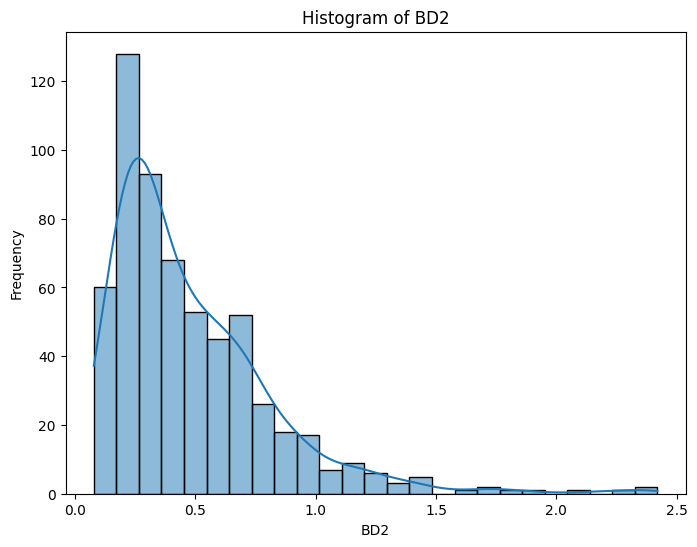

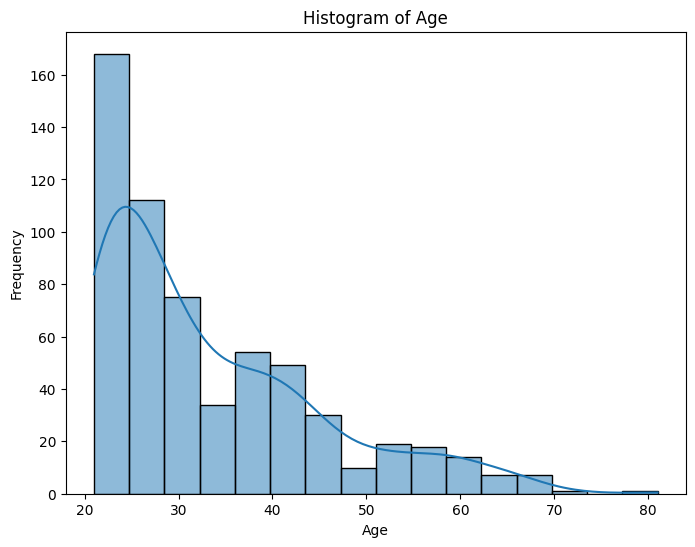

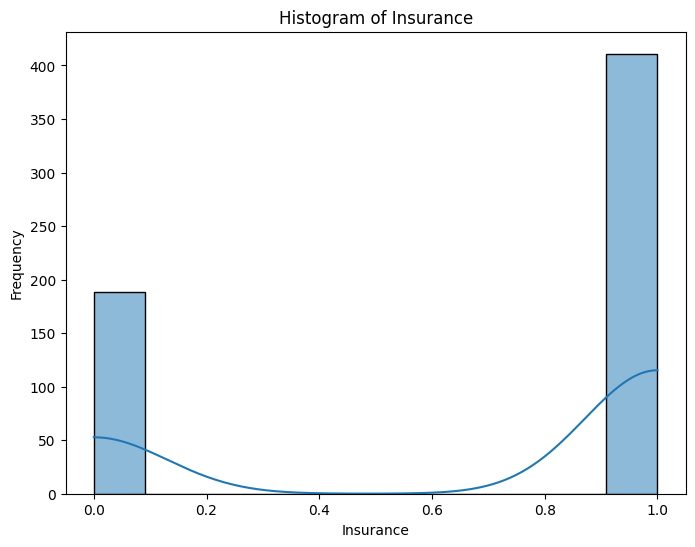

In [31]:
# Histograms
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

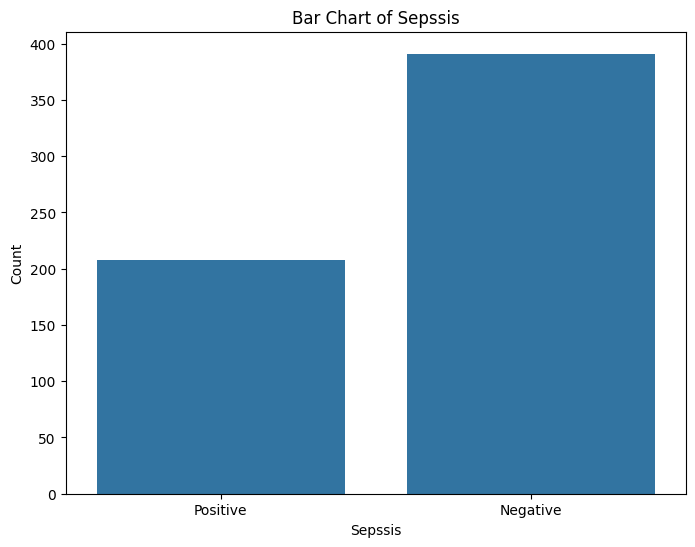

In [32]:

# Bar Charts (for categorical variables)
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=col)
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [33]:

# Frequency Tables
for col in categorical_cols:
    freq_table = data[col].value_counts(normalize=True)
    print(f'Frequency table for {col}:\n{freq_table}\n')


Frequency table for Sepssis:
Sepssis
Negative    0.652755
Positive    0.347245
Name: proportion, dtype: float64



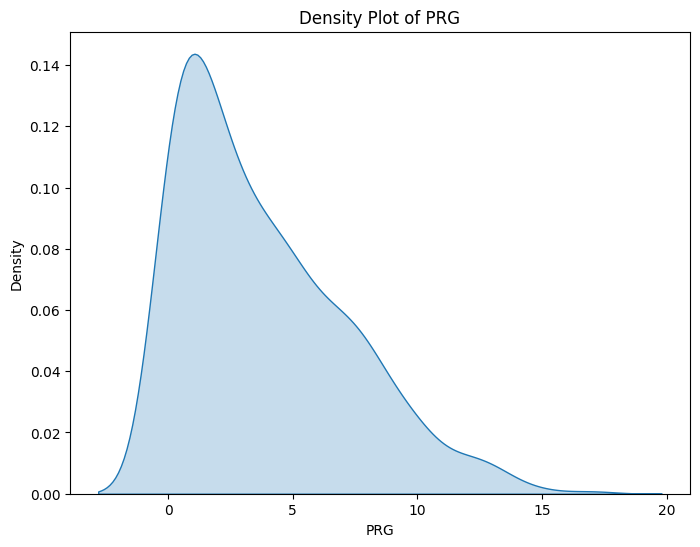

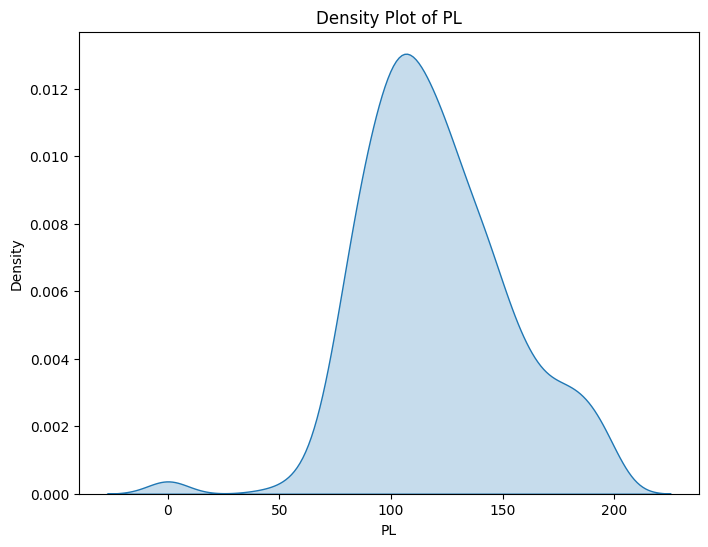

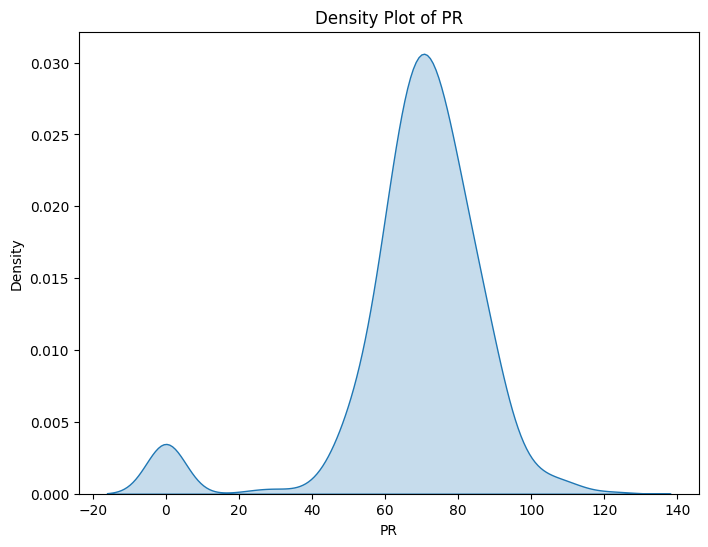

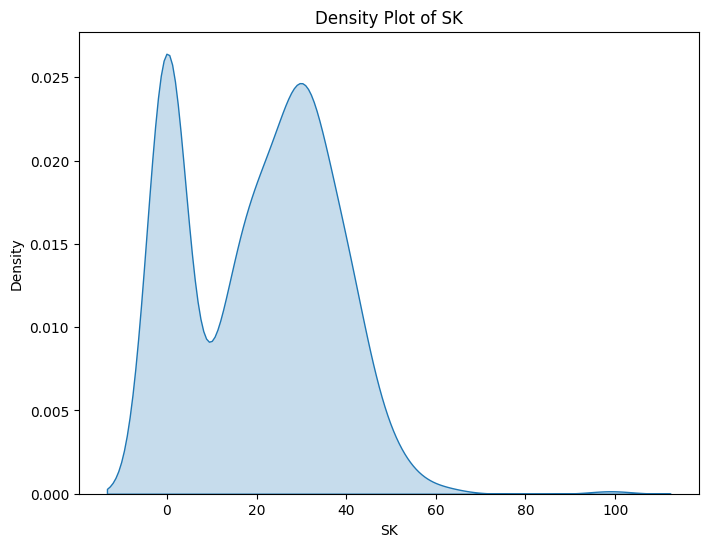

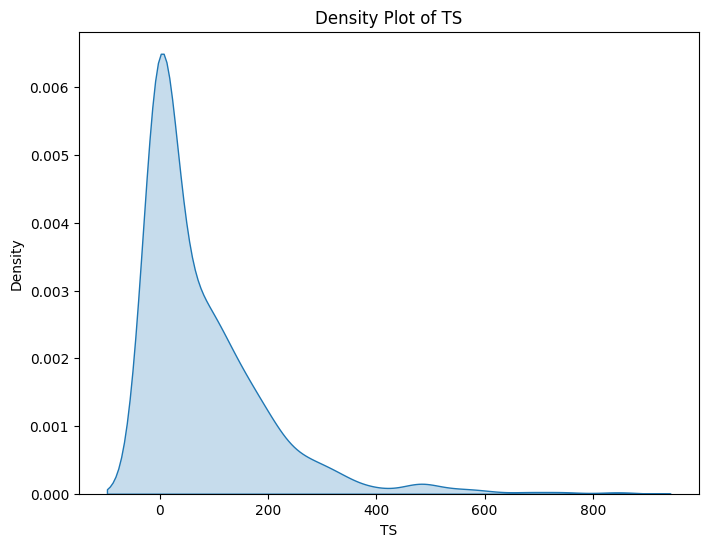

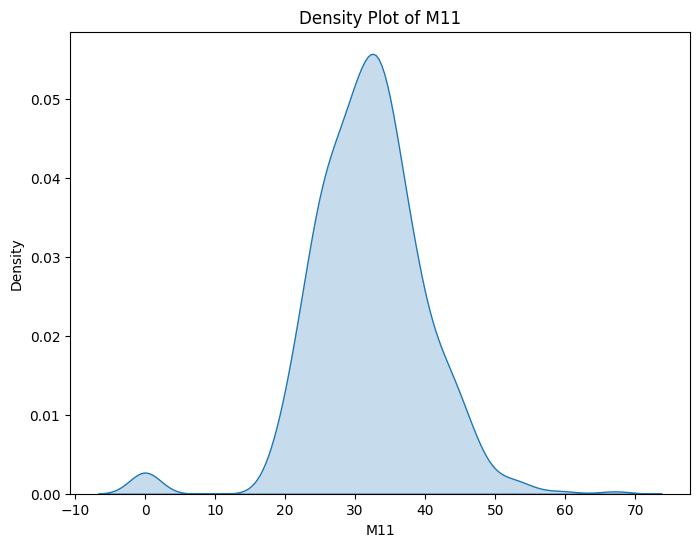

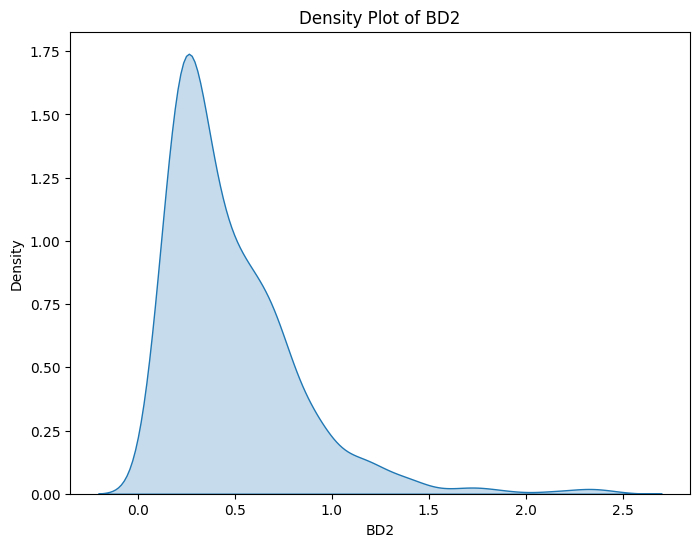

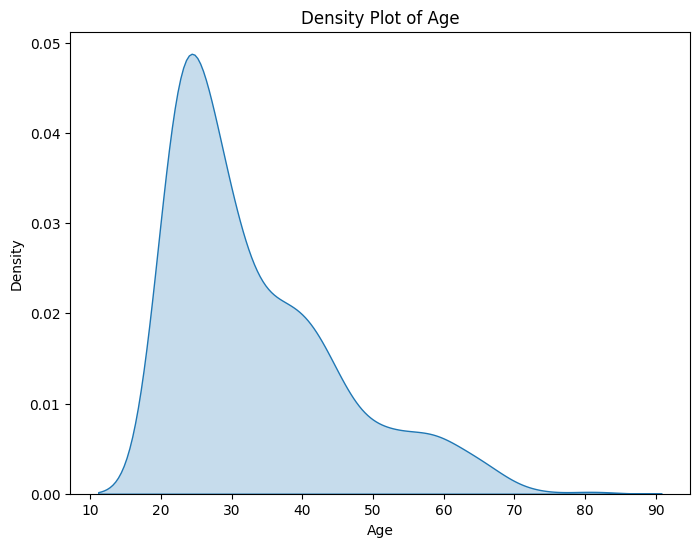

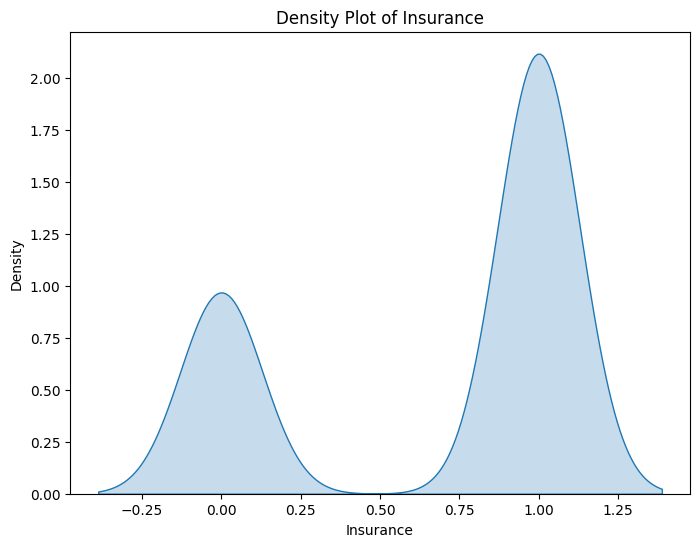

In [34]:

# Density Plots
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=data, x=col, fill=True)
    plt.title(f'Density Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

## Bivariate

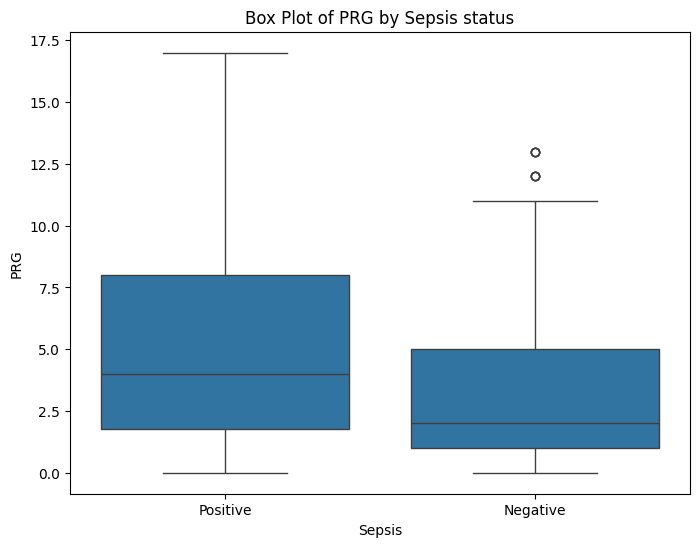

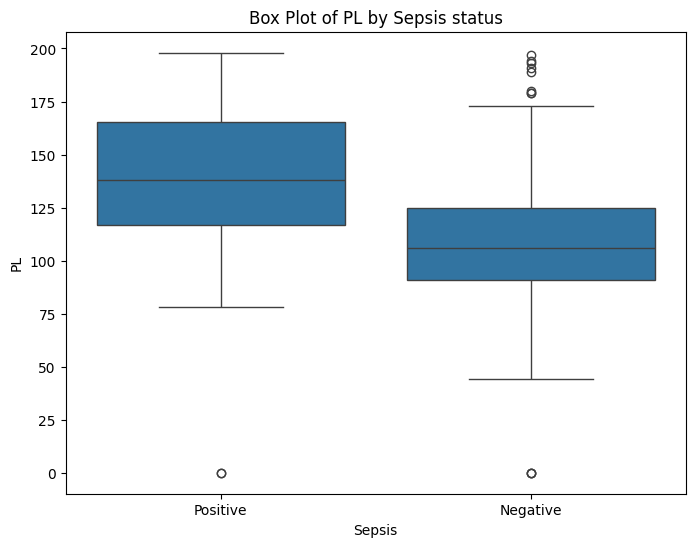

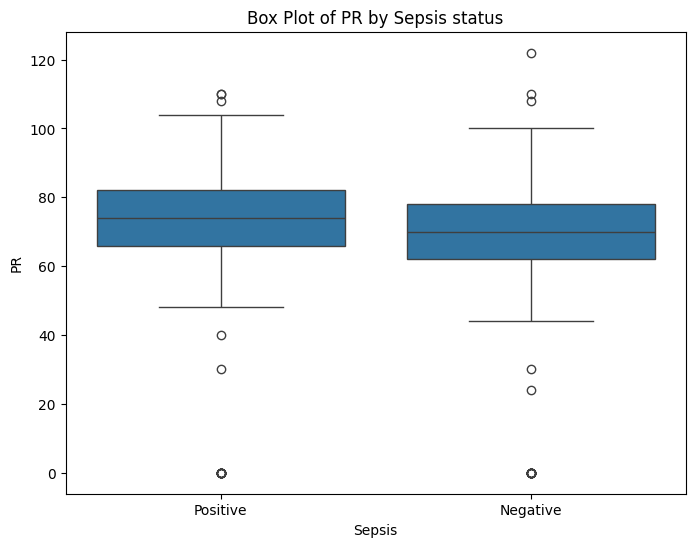

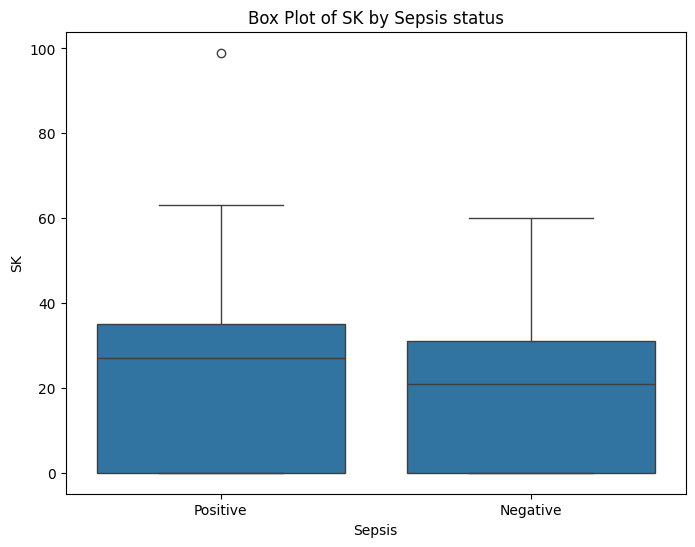

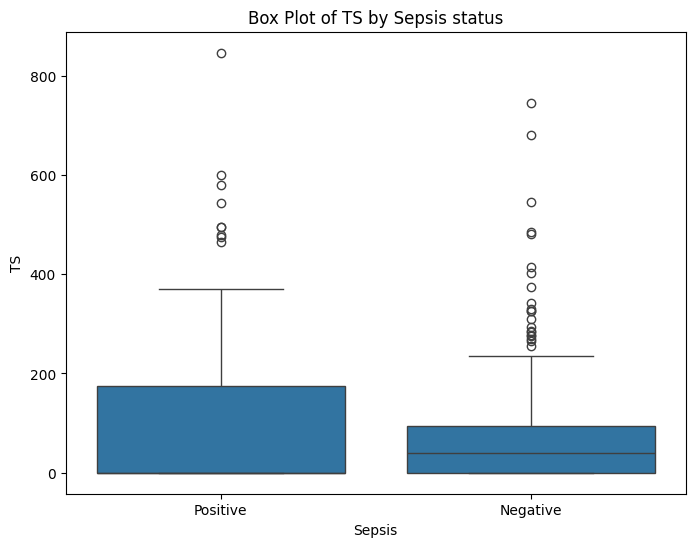

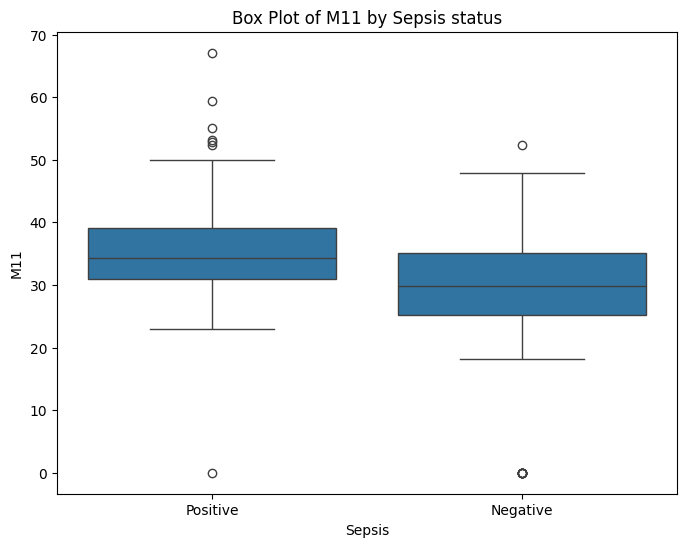

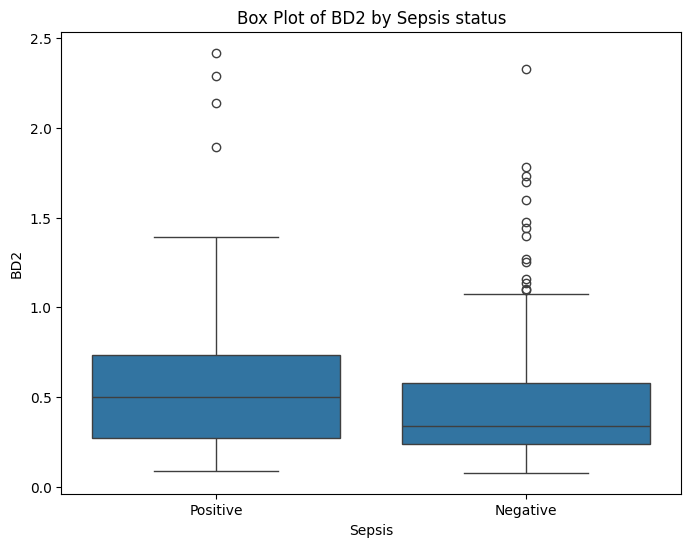

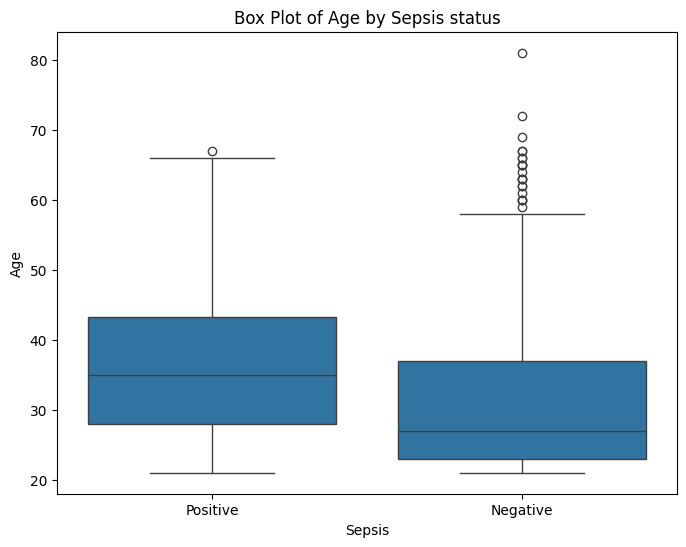

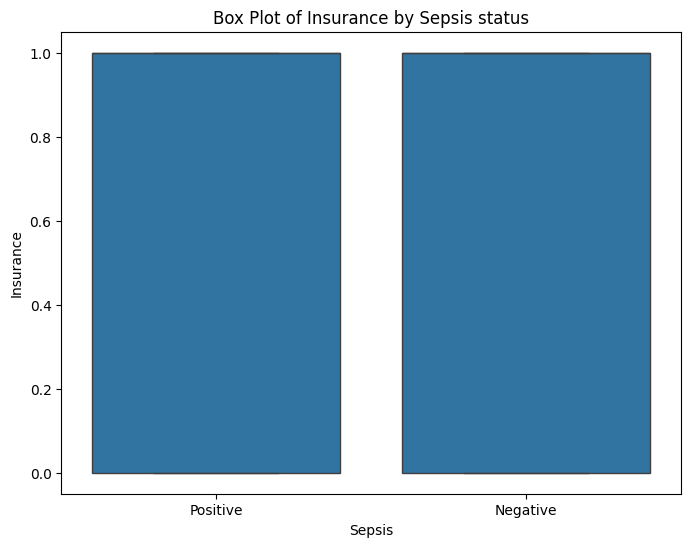

In [35]:
# Box Plots
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data['Sepssis'], y=data[col])
    plt.title(f'Box Plot of {col} by Sepsis status')
    plt.xlabel('Sepsis')
    plt.ylabel(col)
    plt.show()


## DATA PREPARATION

In [36]:
data.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
ID,,,,,,,,,,
ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [37]:
# Rename a column

data.rename(columns={"Sepssis":"Sepsis"}, inplace=True) 

data

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepsis
ID,,,,,,,,,,
ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...
ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative


In [38]:
# check for unique values
data["Sepsis"].unique()

array(['Positive', 'Negative'], dtype=object)

In [42]:
# convert Sepsis column to numeric column
data["Sepsis"]= data["Sepsis"].apply(lambda x: 1 if x=="Positive" else 0 )

data.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepsis
ID,,,,,,,,,,
ICU200010,6,148,72,35,0,33.6,0.627,50,0,1
ICU200011,1,85,66,29,0,26.6,0.351,31,0,0
ICU200012,8,183,64,0,0,23.3,0.672,32,1,1
ICU200013,1,89,66,23,94,28.1,0.167,21,1,0
ICU200014,0,137,40,35,168,43.1,2.288,33,1,1


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 599 entries, ICU200010 to ICU200608
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRG        599 non-null    int64  
 1   PL         599 non-null    int64  
 2   PR         599 non-null    int64  
 3   SK         599 non-null    int64  
 4   TS         599 non-null    int64  
 5   M11        599 non-null    float64
 6   BD2        599 non-null    float64
 7   Age        599 non-null    int64  
 8   Insurance  599 non-null    int64  
 9   Sepsis     599 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 67.6+ KB


In [43]:
data["Sepsis"].unique()

array([1, 0], dtype=int64)